# **Datasets**
Documentation and visualization for the datasets used in **COmpressive Seismic Acquisition Design (COSAD)** project:

* `cube4.npy`
* `data.npy`
* `spii15s.npy`
* `syn3D_cross-spread2.npy`

In [85]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure

In [86]:
###########################################################
#         Functions for seismic visualization in          #
#  time-space (TX) and frequency-wavenumber (FK) domains  #
###########################################################

def TX_visualize(data):
    '''
    Parameters
    ----------
    data : 2D array-like
           seismic data

    Returns
    -------
    Plot for visualizing any shot in time-space domain
    '''
    plt.imshow(data, aspect = 'auto', cmap = 'seismic')
    plt.xlabel('Traces (nx)')
    plt.ylabel('Time samples (nt)')
    plt.colorbar()

def fk(data, dt, dx):
    '''
    Compute the two-dimensional Discrete Fourier Transform.

    Parameters
    ----------
    data : array-like
           seismic data
    dt   : integer
           time interval
    dx   : integer
           trace interval

    Returns
    -------
    FK   : ndarray
           The transformed input along the [0, 1] axis
    f    : 1D array
    kx   : 1D array
    '''
    nt=data.shape[0]
    nx=data.shape[1]
    nt_fft=2*nt
    nx_fft=2*nx
    data_f=np.fft.fft(data,n=nt_fft,axis=0)
    data_fk=np.fft.fft(data_f,n=nx_fft,axis=1)
    FK=20*np.log10(np.fft.fftshift(np.abs(data_fk)))
    FK=FK[nt:,:]
    f = np.linspace(-0.5,0.5,nt_fft)/dt
    kx = np.linspace(-0.5,0.5,nt_fft)/dx
    return FK, f, kx

def FK_visualize(data):
    '''
    Parameters
    ----------
    data : 2D array-like
           seismic data

    Returns
    -------
    Plot for visualizing any shot in frequency-wavenumber domain
    '''
    plt.imshow(data[:200], aspect='auto', cmap='jet', extent=[kx.min(), kx.max(), 65, 0])
    plt.xlabel('Wavenumber 1/m')
    plt.ylabel('Frequency (Hz)')
    plt.colorbar()

# **`cube4.npy`**
Synthetic cross-spread seismic data modeled in **XXX** geological conditions. The total length of the seismic design is **XXX** km horizontally and **XXX** ms in depth.

**Seismic adquisition parameters:**

* Time samples (`nt`) = `1001`
* Number of traces (`nx`) = `80`
* Number of shots (`ns`) = `18`
* Time interval (`dt`) = `XXX`
* Trace interval (`dx`) = `XXX`

In [87]:
# download file
!gdown "https://drive.google.com/uc?export=download&id=16WV8S-SVOOzFhfDRM9RHiZVKkHLTbwtD"

Downloading...
From: https://drive.google.com/uc?export=download&id=16WV8S-SVOOzFhfDRM9RHiZVKkHLTbwtD
To: /content/cube4.npy
100% 11.5M/11.5M [00:00<00:00, 172MB/s]


data1 dimensions are: (1001, 80, 18)


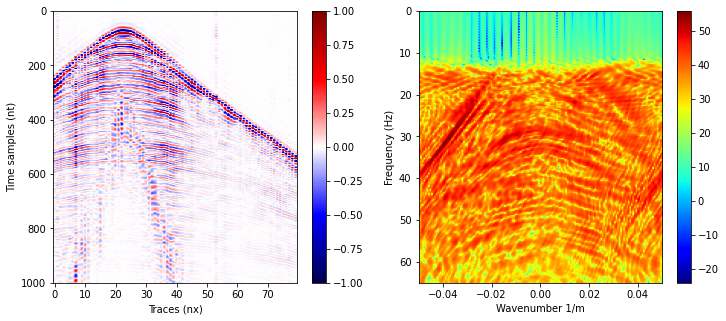

In [88]:
data1 = np.load('cube4.npy')
print('data1 dimensions are:', data1.shape)

# calculate FK domain
shot = 9
dt = 0.04
dx = 10
FK, f, kx = fk(data1[:,:,shot], dt, dx)

# visualize TX and FK domains
figure(figsize=(12, 5))
plt.subplot(1,2,1)
TX_visualize(data1[:,:,shot])
plt.subplot(1,2,2)
FK_visualize(FK)

# **`data.npy`**
Synthetic single shot.

**Seismic adquisition parameters:**

* Time samples (`nt`) = `800`
* Number of traces (`nx`) = `100`
* Number of shots (`ns`) = `1`
* Time interval (`dt`) = `XXX`
* Trace interval (`dx`) = `XXX`

In [89]:
# download file
!gdown "https://drive.google.com/uc?export=download&id=1YOsZw6uDMTLS7iFAkZguFf9zy6XxEB6e"

Downloading...
From: https://drive.google.com/uc?export=download&id=1YOsZw6uDMTLS7iFAkZguFf9zy6XxEB6e
To: /content/data.npy
100% 640k/640k [00:00<00:00, 68.2MB/s]


data2 dimensions are: (800, 100)


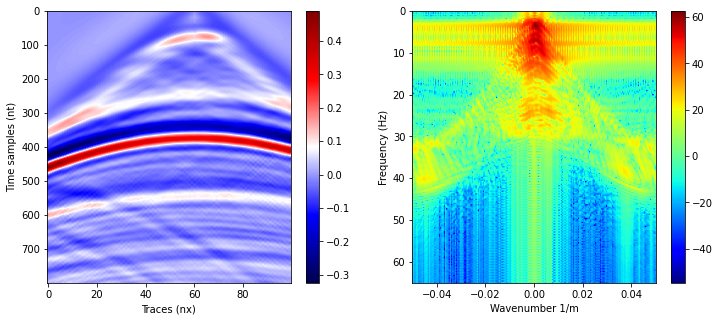

In [90]:
data2 = np.load('data.npy').T
print('data2 dimensions are:', data2.shape)

# calculate FK domain
dt = 0.04
dx = 10
FK, f, kx = fk(data2, dt, dx)

# visualize TX and FK domains
figure(figsize=(12, 5))
plt.subplot(1,2,1)
TX_visualize(data2)
plt.subplot(1,2,2)
FK_visualize(FK)

# **`spii15s.npy`**
This data was built by the SEG Advanced Modeling Program (SEAM) during its second project, called "SEAM Phase II–Land Seismic Challenges". The Foothills models are focused on mountainous regions with sharp topography at the surface and compressive fold and thrust tectonics at depth. For further information refer to https://drive.google.com/file/d/12274Q1JupEP5g7jdEb_m_KQCgMunPuNA/view.

**Seismic adquisition parameters:**

* Time samples (`nt`) = `1034`
* Number of traces (`nx`) = `100`
* Number of shots (`ns`) = `15`
* Time interval (`dt`) = `0.004` ms
* Trace interval (`dx`) = `12.5` m

In [91]:
# download file
!gdown "https://drive.google.com/uc?export=download&id=1H84WVcOy4uVWQfTulBdYB2jz_hPDG8mG"

Downloading...
From: https://drive.google.com/uc?export=download&id=1H84WVcOy4uVWQfTulBdYB2jz_hPDG8mG
To: /content/spii15s.npy
100% 12.4M/12.4M [00:00<00:00, 109MB/s]


data3 dimensions are: (1034, 100, 15)


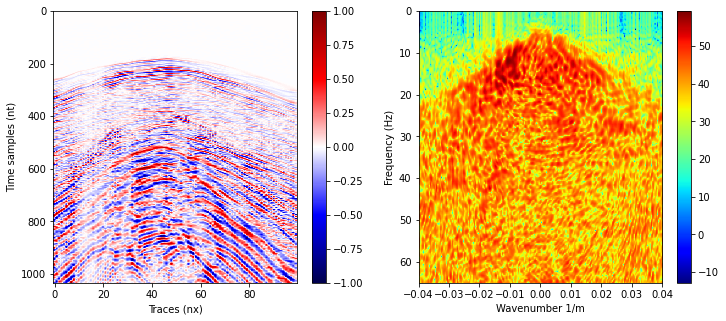

In [92]:
data3 = np.load('spii15s.npy')
print('data3 dimensions are:', data3.shape)

# calculate FK domain
shot = 7
dt = 0.004
dx = 12.5
FK, f, kx = fk(data3[:,:,shot], dt, dx)

# visualize TX and FK domains
figure(figsize=(12, 5))
plt.subplot(1,2,1)
TX_visualize(data3[:,:,shot])
plt.subplot(1,2,2)
FK_visualize(FK)

# **`syn3D_cross-spread2.npy`**
Synthetic cross-spread seismic data modeled using finite differences with `devito`package (for further information refer to https://github.com/devitocodes/devito). The simulated geological conditions were semi-horizontal layers with minor folds and velocity anomalies. The total length of the seismic design is 1010 m horizontally and 1000 ms in depth.

**Seismic adquisition parameters:**

* Time samples (`nt`) = `1106`
* Number of traces (`nx`) = `101`
* Number of shots (`ns`) = `15`
* Time interval (`dt`) = `0.000905` ms
* Trace interval (`dx`) = `10` m

In [93]:
# download file
!gdown "https://drive.google.com/uc?export=download&id=1UrXw9hOiYcA5K3s8GnO_DIq5zLZLKzCr"

Downloading...
From: https://drive.google.com/uc?export=download&id=1UrXw9hOiYcA5K3s8GnO_DIq5zLZLKzCr
To: /content/syn3D_cross-spread2.npy
100% 13.4M/13.4M [00:00<00:00, 113MB/s] 


data4 dimensions are: (1106, 101, 15)


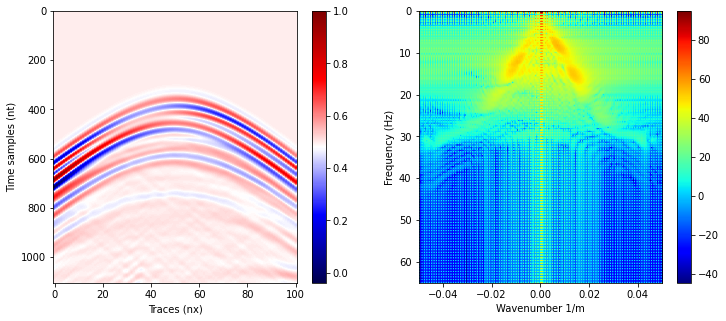

In [94]:
data4 = np.load('syn3D_cross-spread2.npy')
print('data4 dimensions are:', data4.shape)

# calculate FK domain
shot = 1
dt = 0.000905
dx = 10
FK, f, kx = fk(data4[:,:,shot], dt, dx)

# visualize TX and FK domains
figure(figsize=(12, 5))
plt.subplot(1,2,1)
TX_visualize(data4[:,:,shot])
plt.subplot(1,2,2)
FK_visualize(FK)